# ***Medical Cost Prediction***

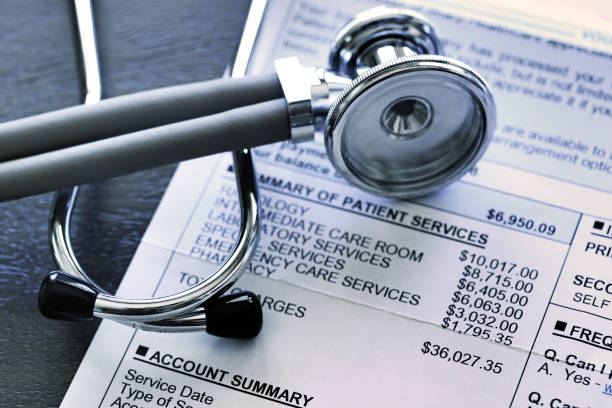


Many factors that affect how much you pay for health insurance are not within your control.The dataset used for this analysis is Insurance dataset from [Kaggle](https://www.kaggle.com/mirichoi0218/insurance). Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost.



| Variable | Description |
| --- | --- |
| age | age of primary beneficiary |
| sex | insurance contractor gender, female, male|
|bmi | body mass index |
|children | number of children covered by health insurance |
|smoker | smoking |
|region | the beneficiary's residential area in the US |
|charges | individual medical costs billed by health insurance |

## ***Objective***:  
In this project, my main aim is to show ways to go deep into the data story-telling even though the dataset is small. Also, I will work on a model that could give us an approximation as to what will be the charges of the patients. Nevertheless, we must go deeply into what factors influenced the charge of a specific patient. In order to do this we must look for patterns in our data analysis and gain extensive insight of what the data is telling us. Lastly, we will go step by step to understand the story behind the patients in this dataset only through this way we could have a better understanding of what features will help our model have a closer accuracy to the true patient charge.  

Our goal is tro predict the medical expenses of an individual based on his background data.  

---

In [10]:
#importing the libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [11]:
pwd

'D:\\project\\Medical Cost prediction\\data'

In [12]:
#Loading the dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preprocessing

In [13]:
#number of rows and columns
df.shape

(1338, 7)

In [14]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
#checking discriptive statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
#value counts for categorical variables
print(df.sex.value_counts(),'\n',df.smoker.value_counts(),'\n',df.region.value_counts())

sex
male      676
female    662
Name: count, dtype: int64 
 smoker
no     1064
yes     274
Name: count, dtype: int64 
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [17]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Exploratory Data Analysis

Visualization of the data is a good way to understand the data. In this section, I will plot the distribution of each variable to get an overview about their counts and distributions.

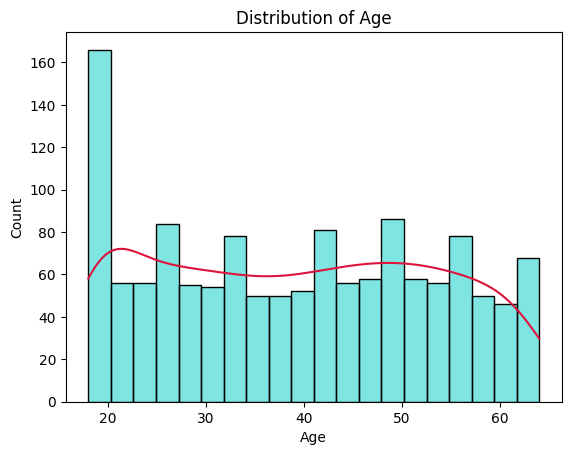

In [18]:
#age distribution
ax=sns.histplot(data=df,x="age",bins=20, kde=True,color='#00CDC7')
ax.lines[0].set_color('crimson')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

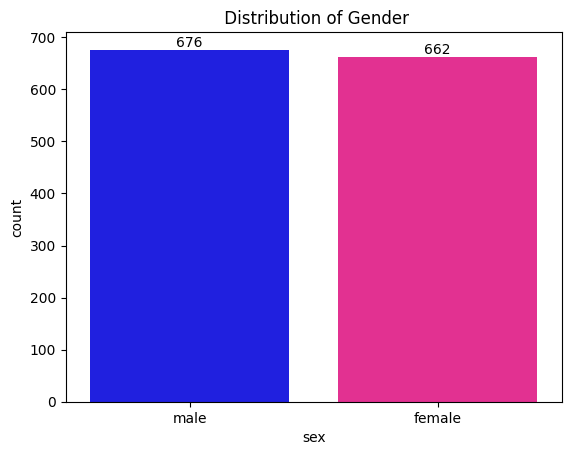

In [19]:
#gender Distribution plot
genders = {"male": "blue", "female": "deepPink"}
ax=sns.countplot(data=df,x="sex",palette=genders,order=df['sex'].value_counts(ascending=False).index)
abs_values = df['sex'].value_counts(ascending=False).values
ax.bar_label(labels=abs_values,container=ax.containers[0])
plt.title(' Distribution of Gender')
plt.show()

### **Observations**:  

- It is clear that number of males and females are almost equal in the dataset.  
--- 

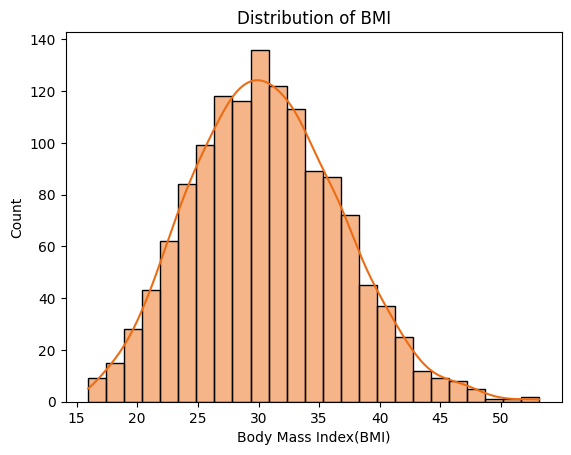

In [20]:
#bmi distribution
sns.histplot(df.bmi,bins=25, kde=True,color='#EC6C13')
plt.title('Distribution of BMI')
plt.xlabel('Body Mass Index(BMI)')
plt.ylabel('Count')
plt.show()

### ***Observations***:     
- The BMI or Body Mass Index follows a symmetric about distribution which is symmetric about 30.  
- Most of the individuals have BMI between 25 to 40  they are considered to be obese. Obesity is a medical condition in which a person has excessive body fat. It is a major risk factor for a number of health problems, including heart disease, stroke, type 2 diabetes, and some types of cancer.  
---


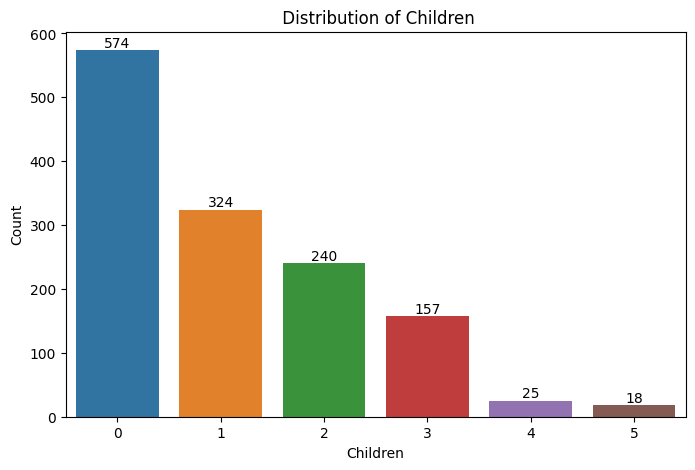

In [21]:
#child count distribution
plt.figure(figsize=(8,5))
ax=sns.countplot(x = 'children', data = df, order=df['children'].value_counts(ascending=False).index)
abs_values=df['children'].value_counts()
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title(' Distribution of Children')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

### ***Observations***  

- The graph clearly shows that most of the patients have no children and very few patients have more than 3 children.  
---

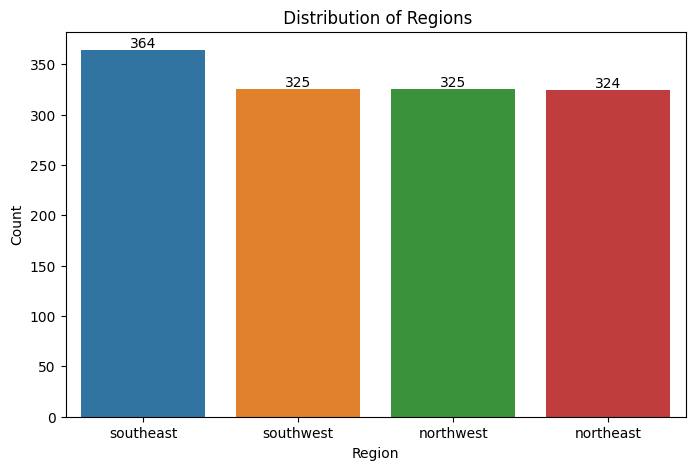

In [22]:
#regionwise plot
plt.figure(figsize=(8,5))
ax=sns.countplot(x = 'region',order=df['region'].value_counts(ascending=False).index, data = df)
abs_values = df['region'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title(' Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

### ***Observations:***
- The count of patient from northwest is slighltly higher than the other regions, but the number of patients from other regions are almost equal.
- Northwest and northeast has the same percentage and southeast has the highest(27.2%).  
---

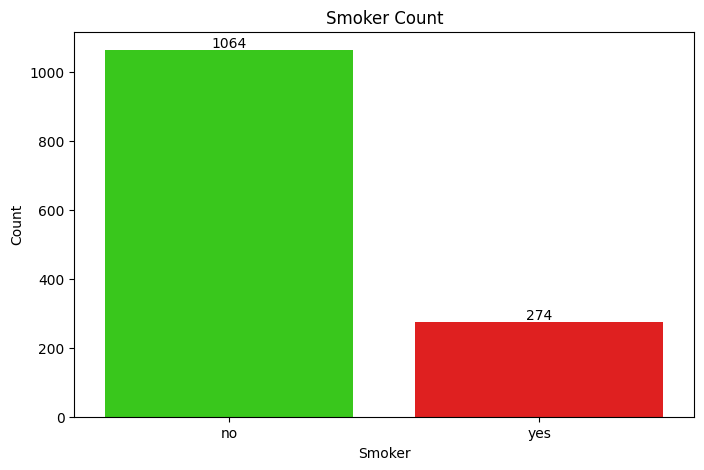

In [23]:
#count of smokers
plt.figure(figsize=(8,5))
smoke = {"no": "#26E300", "yes": "red"}
ax=sns.countplot(x = 'smoker', palette=smoke,data = df,order=df['smoker'].value_counts(ascending=False).index)
abs_values=df['smoker'].value_counts(ascending=False)
ax.bar_label(container=ax.containers[0],labels=abs_values)
plt.title('Smoker Count')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

### ***Observations***:  
- smokers are very few in the dataset.
- Nearly 80% of the patients are non-smokers ie the total no of non-smokers is more or less four times than smokers.  
---

Smoker count with respect to the children count.

Text(0.5, 1.0, 'Smokers Count with Respect To Children ')

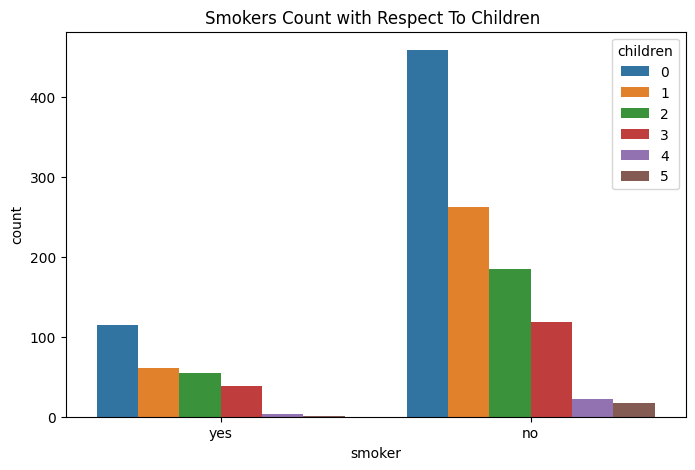

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x = df.smoker, hue = df.children)
plt.title("Smokers Count with Respect To Children ")

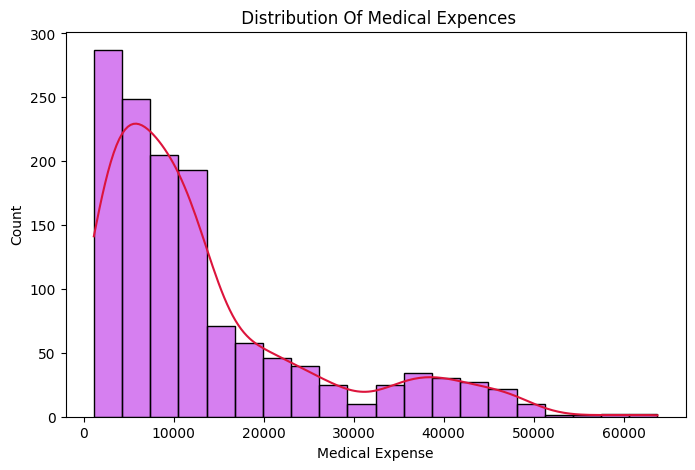

In [25]:
#charges distribution
plt.figure(figsize=(8,5))
ax=sns.histplot(df.charges,bins=20, kde=True,color='#AF00E3')
ax.lines[0].set_color('crimson')
plt.title(' Distribution Of Medical Expences')
plt.xlabel('Medical Expense')
plt.ylabel('Count')
plt.show()

### ***Observations***:  
- Most of the medical expences of an individual is below 20000.  
- Very few no of individuals have medical expances above 50000.  
- Inshort medical expences are low for most of the cases.

----
Now we will plot diffrent pie charts to get a better understanding of the data

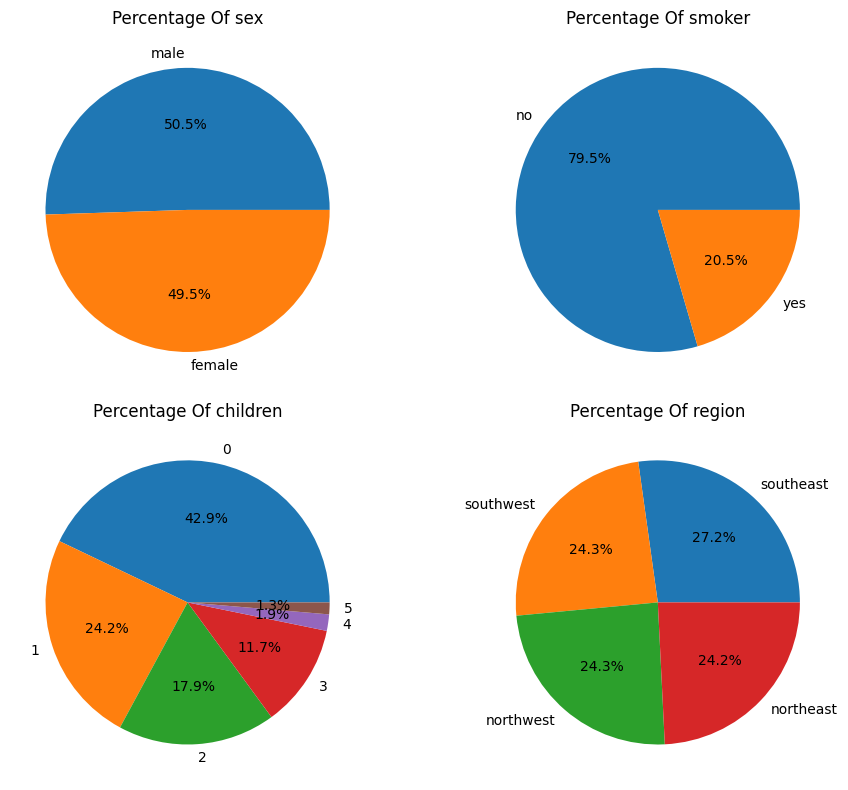

In [26]:
#Pie Chart of all the categorical variables
categorical_features = ["sex", "smoker","children","region"]
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, c in enumerate(categorical_features):
    s = df[c].value_counts()
    plt.subplot(2, 2, i + 1)
    plt.pie(s, labels=s.index, autopct='%1.1f%%')
    plt.title(f'Percentage Of {c}')
plt.tight_layout()
plt.show()

#### Now Let us Look at the diffrent Scatterplots and Boxplots to gain more insights about the data.
---

d:\project\Medical Cost prediction\med_env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'PairWise Scatterplot Of the dataset')

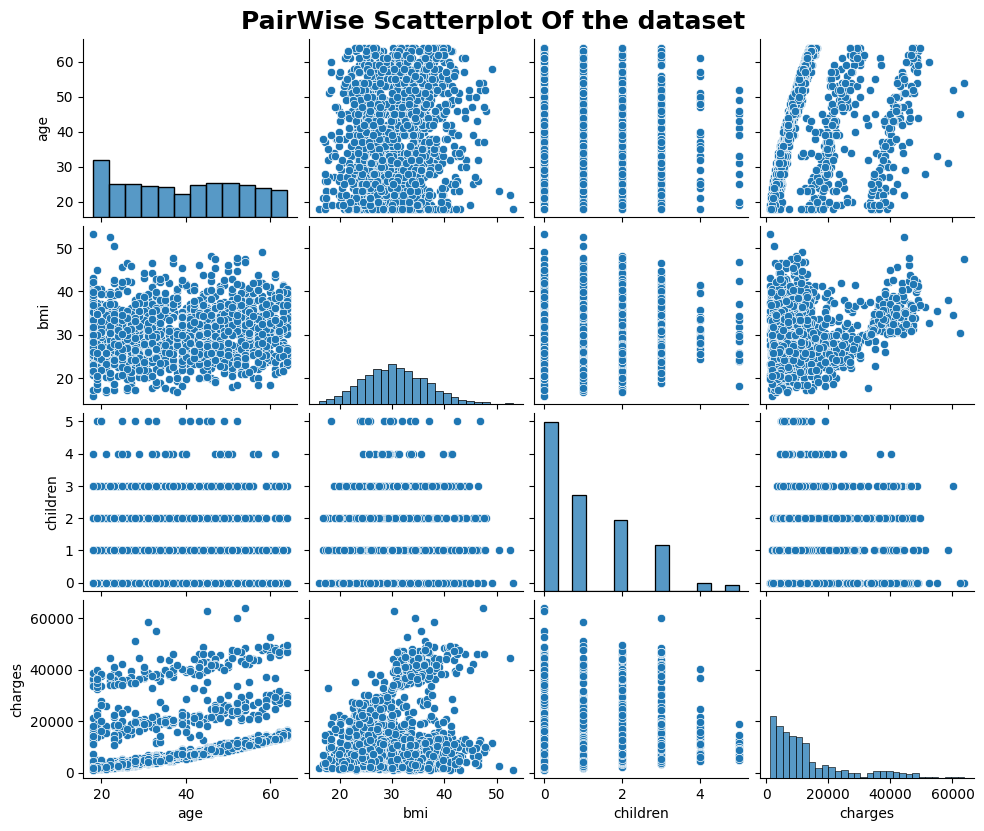

In [27]:
#Pairwise scatterplot of the numeric variables
g=sns.pairplot(df)
g.fig.set_size_inches(10,8)
plt.suptitle("PairWise Scatterplot Of the dataset", fontsize=18, fontweight="bold",y=1.02)


In [28]:
numerical_features = ['age', 'bmi', 'charges']

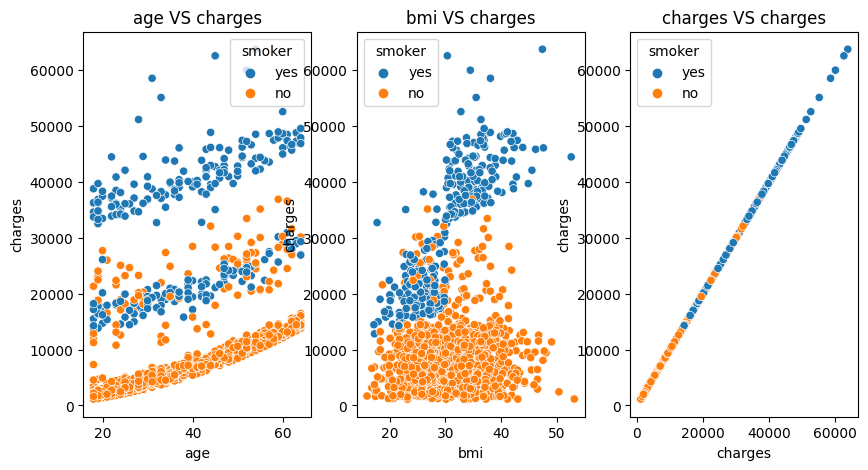

In [29]:
#numeric variables vs charges 
fig, axs = plt.subplots(1, 3, figsize=(10,5))
for i,n in enumerate(numerical_features):
    plt.subplot(1,3, i + 1)
    sns.scatterplot(x=n, y="charges",data=df,hue="smoker")
    plt.title(f"{n} VS charges")
    plt.xlabel(f"{n}")
    plt.ylabel("charges")
plt.show()

### ***Observations:***  
- Now, we clearly understand the variation in charges with respect to age and smoking habits. The medical expense of smokers is higher than that of non-smokers.
In non-smokers, the cost of treatment increases with age which is obvious. But in smokers, the cost of treatment is high even for younger patients, which means the smoking patients are spending upon their smoking related illness as well as age related illness.
- From the BMI vs Medical charges plot we can understand that irrespective of the BMI the smokers have higher medical expenses than nonsmokers.And most of the expences for the non smokers are less than 20,000 but in the other hand the smokers have a higher medical expences from which we can understand that the patients who used to smoke have higher medical expenses than the patients who didn't use to smoke irrespective of their BMI.
---

d:\project\Medical Cost prediction\med_env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


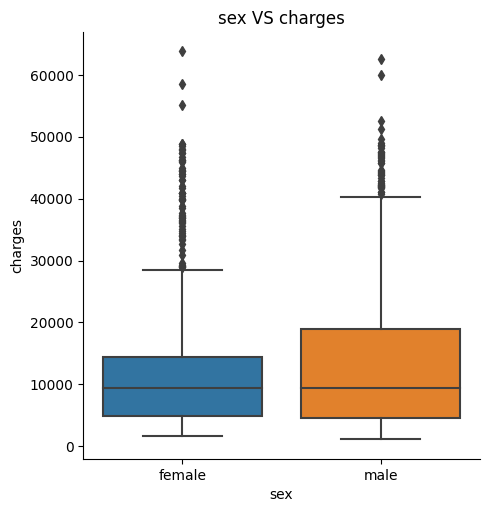

d:\project\Medical Cost prediction\med_env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


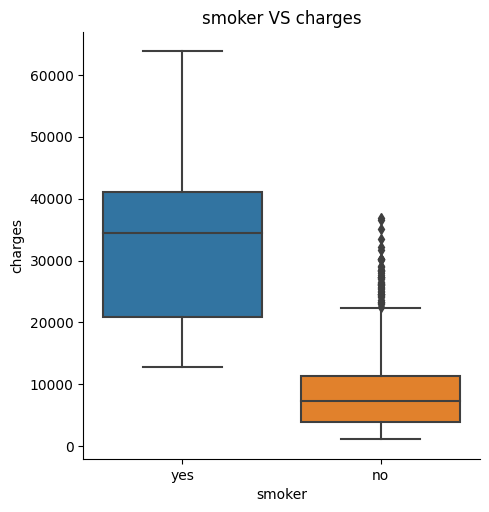

d:\project\Medical Cost prediction\med_env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


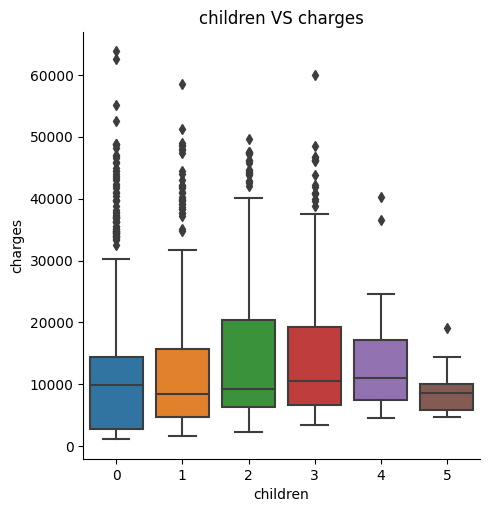

d:\project\Medical Cost prediction\med_env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


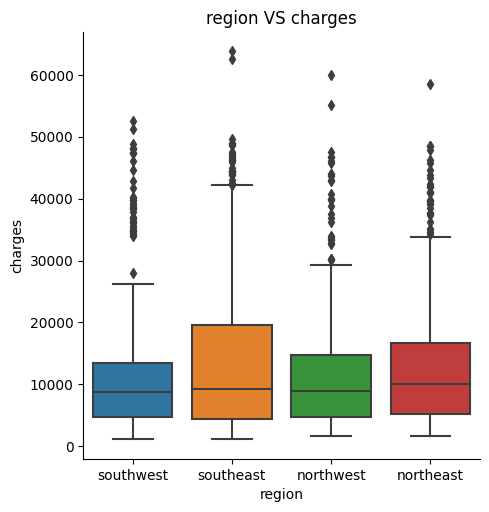

In [30]:
#Boxplots of the categorical variables wrt charges
for  n in categorical_features:
    sns.catplot(x=n, y="charges", data=df, kind="box")
    plt.title(f"{n} VS charges")
    plt.show()

### ***Observations*** 
 
- There are some outliars present in the dataset.  
- It does not mean they are false or I have to remove them as the no of samples is quite low.
---

Text(0.5, 0, 'Sex')

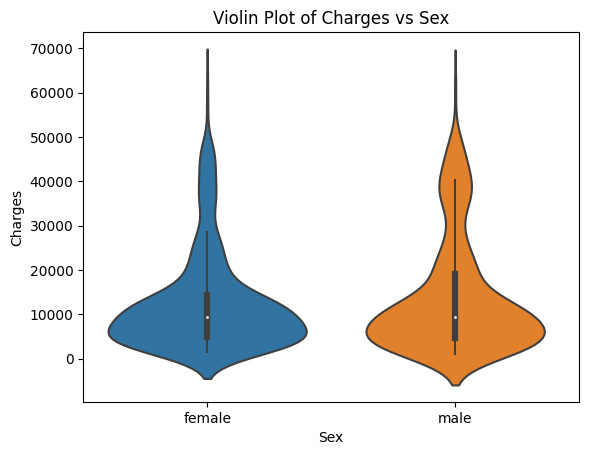

In [31]:
#violinplot of charges vs sex
ax=sns.violinplot(x = 'sex', y = 'charges', data = df)
ax.set_title("Violin Plot of Charges vs Sex")
ax.set_ylabel("Charges")
ax.set_xlabel("Sex")

Text(0.5, 0, 'Sex')

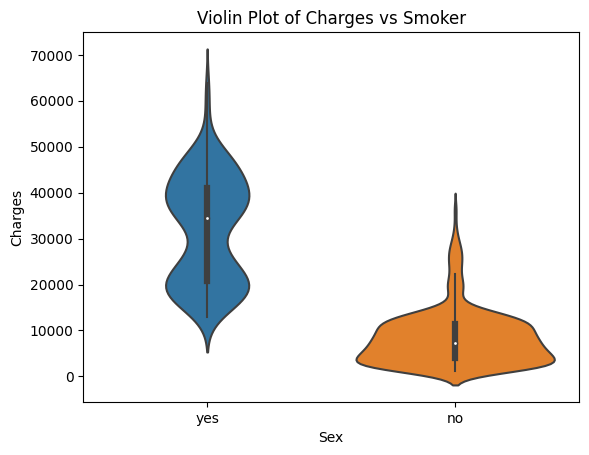

In [32]:
#violinplot of charges vs smokers
ax=sns.violinplot(x = 'smoker', y = 'charges', data = df)
ax.set_title("Violin Plot of Charges vs Smoker")
ax.set_ylabel("Charges")
ax.set_xlabel("Sex")

## **Categorical Feature Encoding**  
Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the models to give and improve the predictions.  
 1. **Label Encoding:** converting categorical features into numerical features. Here the output will be 1 dimensional.
 2. **One hot encoding :** convert each categorical value into new categorical column and assign a binary value of 0 to 1 to them.This type of encoding is used when the data is nominal. Newly created binary features can be considered dummy variables. After one hot encoding, the number of dummy variables depends on the number of categories presented in the data.
 3. **Dummy variable trap :** occurs when 2 or more dummy variables created by one hit encoding are highly correlated(multicolinear).

In [33]:
##Converting category labels into numerical using LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
print(label.inverse_transform([0, 1]))
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
print(label.inverse_transform([0, 1]))
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
print(label.inverse_transform([0, 1,2,3]))
df.dtypes

['female' 'male']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']


age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

We have used label encoding for this problem. we had three categorical varibles in our dataset given as "sex","smoker","region".  
We have encoded the sex varible as **0 for the females and 1 for the males.**    
Similarly for smoker we have encoded **0 as a non smoker and 1 as a smoker.**  
For the region varible we had 4 categories so we have encoded **0 as "Northeast",1 as "Northwest",2 as "Southeast" and 3 as "Southwest".**

In [34]:
#Transformed dataframe after label encoding
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


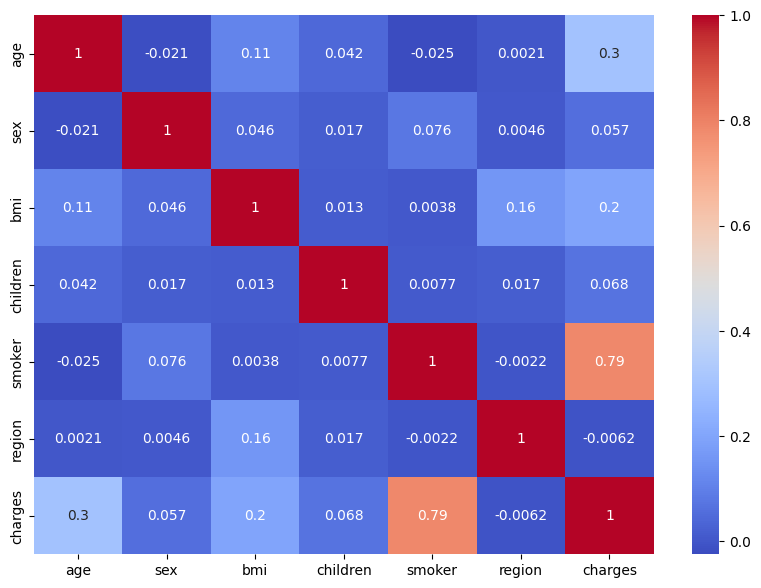

In [35]:
#plotting the coorelation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

### **Observations:**

- The variable smoker shows a significant coorelation with the medical expenses as the correlation coefficient between medical charges and smoking is 0.79.

###  Now I will explore more into patients' smoking habits and their relationa with other factors.

#### Plotting the smoker count with patient's gender

d:\project\Medical Cost prediction\med_env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


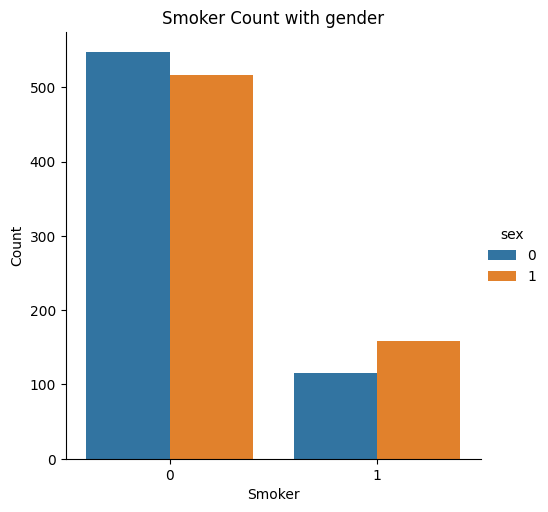

In [36]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=df)
plt.title('Smoker Count with gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

### ***Observations***:  
- We can see that there are more male  smokers than female smokers.  
- There are more no of female non-smokers than male non-smokers.
- We can assume that the medical expanses for the males could be higher than females given that the impact of smoking on medical charges.

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

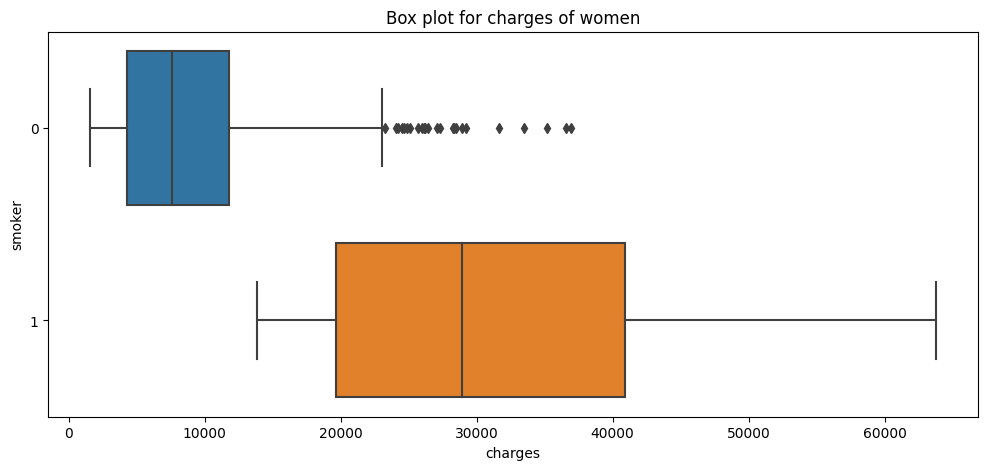

In [37]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h")

<Axes: title={'center': 'Box Plot For Charges Of Men'}, xlabel='charges', ylabel='smoker'>

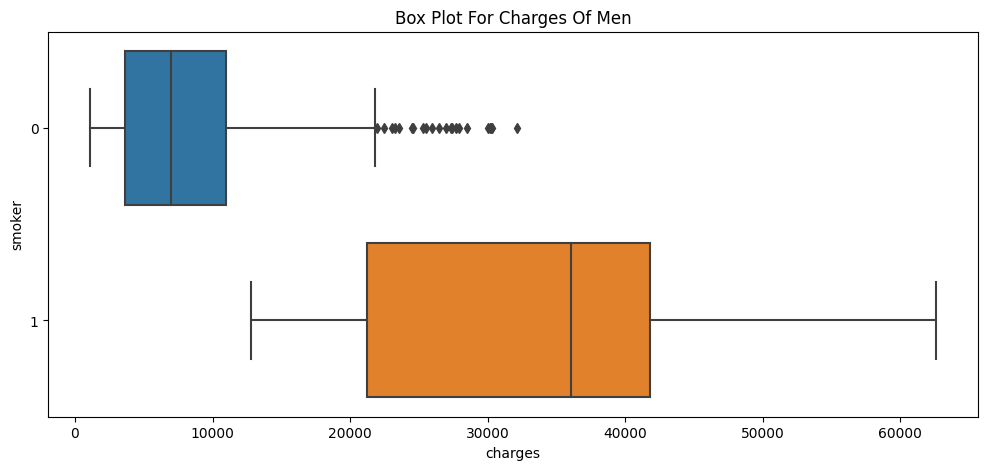

In [38]:
plt.figure(figsize=(12,5))
plt.title("Box Plot For Charges Of Men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h")

### **Observations**:
- The medical expense of males is greater than that of females. 
- Medical expense of smokers is greater than that of non-smokers.

#### Smokers and age distribution

d:\project\Medical Cost prediction\med_env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
d:\project\Medical Cost prediction\med_env\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


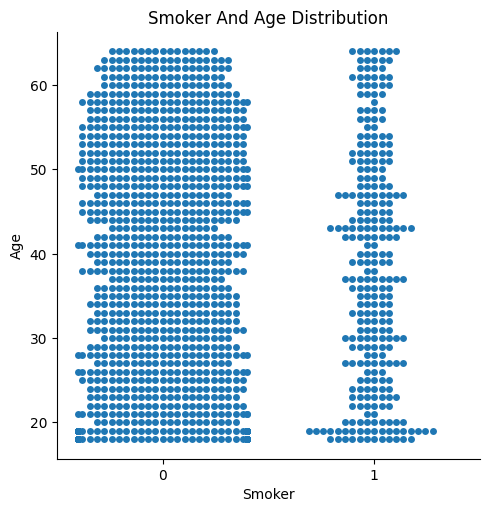

In [39]:
#smokers and age distribution
sns.catplot(x="smoker", y="age", kind="swarm", data=df)
plt.title('Smoker And Age Distribution')
plt.xlabel('Smoker')
plt.ylabel('Age')
plt.show()

### **Observations:**  
- we can see that there significant number of smokers of age 19.
---

 Now I will study the medical expense of smokers of age 19.

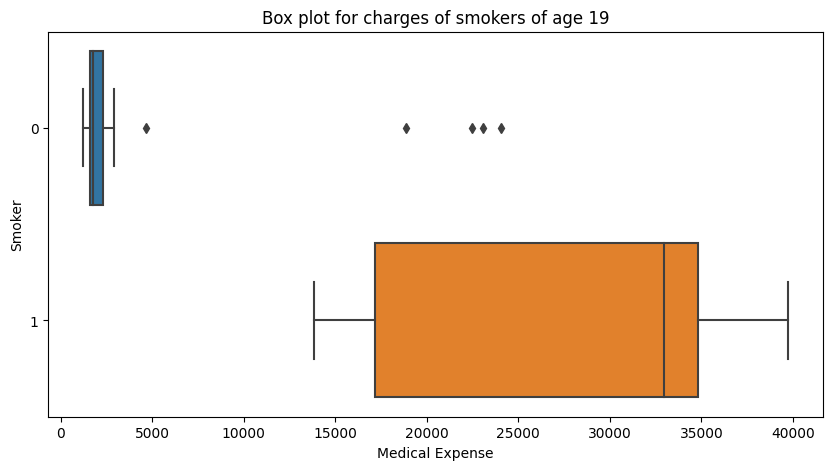

In [40]:
#smokers of age 19
plt.figure(figsize=(10,5))
plt.title("Box plot for charges of smokers of age 19")
sns.boxplot(y="smoker", x="charges", data =  df[(df.age == 19)] , orient="h")
plt.xlabel('Medical Expense')
plt.ylabel('Smoker')
plt.show()

Surprisingly the medical expense of smokers of age 19 is very high in comparison to non smokers. In non smokers we can see some outliners, which may be due to illness or accidents.

#### Charges distribution for patients with BMI greater than 30 i.e. obese patients

C:\Users\Kanchan Chowdhury\AppData\Local\Temp\ipykernel_24480\3456930357.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.bmi >= 30)]['charges'])


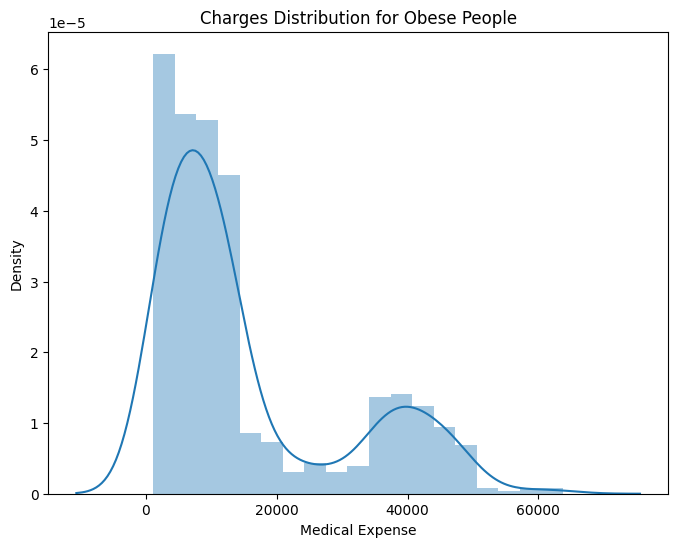

In [41]:
#bmi charges distribution for obese people
plt.figure(figsize=(8,6))
sns.distplot(df[(df.bmi >= 30)]['charges'])
plt.title('Charges Distribution for Obese People')
plt.xlabel('Medical Expense')
plt.show()

#### Charges distribution for patients with BMI less than 30 i.e. healthy patients

C:\Users\Kanchan Chowdhury\AppData\Local\Temp\ipykernel_24480\887406048.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.bmi < 30)]['charges'])


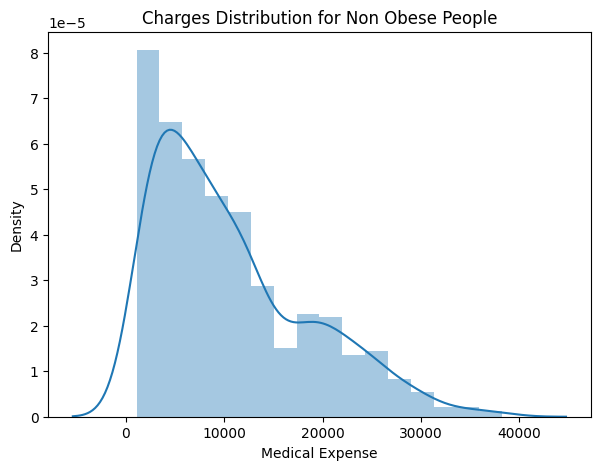

In [42]:
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi < 30)]['charges'])
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical Expense')
plt.show()

### **Observations**:
- Therefore, patients with BMI less than 30 are spending less on medical treatment than those with BMI greater than 30. 
- The patients having BMI greater than 30 has a higher chance of high medical expences.  
--- 

##### Through the EDA, we have a clear understanding about the data and the coorelation between the variables. Now, I will build a model to predict the medical expense of patients.

## Train Test Split

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('charges',axis=1), df['charges'], test_size=0.2, random_state=0)

## Model Building

### Linear Regression

In [44]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [45]:
#Training the Model
lr.fit(x_train,y_train)
#Accuracy of the model on the training data
print("The R^2 for linear regression model on the training data is=",round(lr.score(x_train,y_train),2))

The R^2 for linear regression model on the training data is= 0.74


In [46]:
#model prediction
y_pred = lr.predict(x_test)

In [47]:
df_lr=pd.DataFrame({'Actual value':y_test,"Predicted Value":y_pred})
print("Prediction Table for linear Regression")
df_lr.head(5)

Prediction Table for linear Regression


,Actual value,Predicted Value
578,9724.53000,11017.230479
610,8547.69130,9787.530168
569,45702.02235,37994.782118
1034,12950.07120,16122.778407
198,9644.25250,6930.759230


In [48]:
print("Table of Linear Regression for the test dataset")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Table of Linear Regression for the test dataset
Mean Absolute Error: 3930.3332739011394
Mean Squared Error: 31845929.13415944
Root Mean Squared Error: 5643.219748880902
R2 Score: 0.7998747145449959


C:\Users\Kanchan Chowdhury\AppData\Local\Temp\ipykernel_24480\3855467601.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
C:\Users\Kanchan Chowdhury\AppData\Local\Temp\ipykernel_24480\3855467601.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

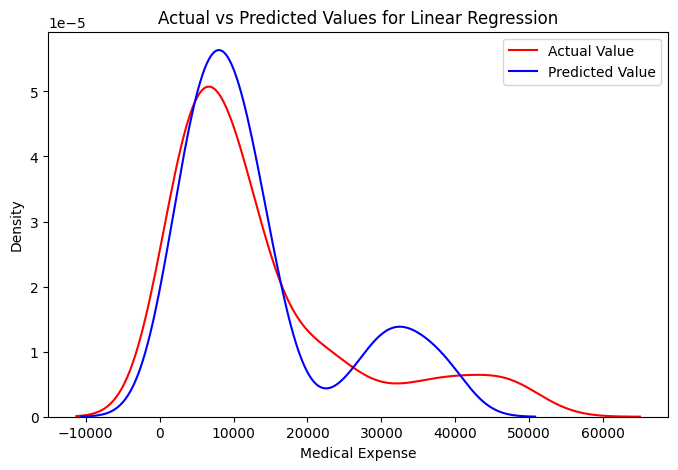

In [49]:
#distribution of actual and predicted values
plt.figure(figsize=(8,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Medical Expense')
plt.legend()
plt.show()

### LASSO Regression

In [50]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2)
Lasso.fit(x_train, y_train)
print("The accuracy of Lasso Regression on the training data is=",round(Lasso.score(x_train, y_train),2))
print("Intercept of Lasso Model is=",Lasso.intercept_)
print("Coefficients of the Lasso Model",Lasso.coef_)

The accuracy of Lasso Regression on the training data is= 0.74
Intercept of Lasso Model is= -11661.838929039533
Coefficients of the Lasso Model [ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]


In [51]:
y_pred_lasso=Lasso.predict(x_test)
# Calculate the accuracy of the predictions
print("Table of Lasso Regression for the test dataset")
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_lasso))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lasso))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print('R2 Score:', r2_score(y_test, y_pred_lasso))


Table of Lasso Regression for the test dataset
Mean Absolute Error: 3930.478756589608
Mean Squared Error: 31846834.730446473
Root Mean Squared Error: 5643.299985863455
R2 Score: 0.7998690236224706


In [52]:
df_lasso=pd.DataFrame({'Actual value':y_test,"Predicted Value":y_pred_lasso})
print("Prediction Table for lasso Regression")
df_lasso.head(5)

Prediction Table for lasso Regression


,Actual value,Predicted Value
578,9724.53000,11018.186308
610,8547.69130,9787.463175
569,45702.02235,37993.858665
1034,12950.07120,16123.427985
198,9644.25250,6930.813342


C:\Users\Kanchan Chowdhury\AppData\Local\Temp\ipykernel_24480\3610167742.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
C:\Users\Kanchan Chowdhury\AppData\Local\Temp\ipykernel_24480\3610167742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

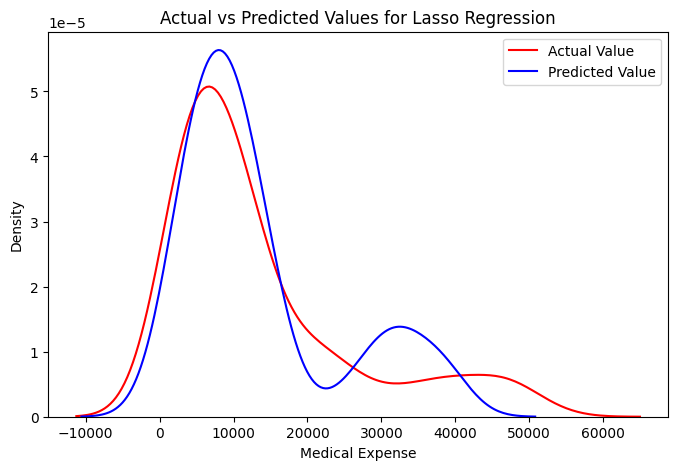

In [53]:
#distribution of actual and predicted values
plt.figure(figsize=(8,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred_lasso,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Lasso Regression')
plt.xlabel('Medical Expense')
plt.legend()
plt.show()

### Decision Tree Regressor

In [54]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree

DecisionTreeRegressor()

In [55]:
#model training
dtree.fit(x_train,y_train)
print("The R^2 Score of the decision tree regressor for the training data is=",round(dtree.score(x_train,y_train),2))

The R^2 Score of the decision tree regressor for the training data is= 1.0


In [56]:
#model prediction for the test data
dtree_pred = dtree.predict(x_test)

In [57]:
# Calculate the accuracy of the predictions
print("Table of Decision Tree Regressor for the test dataset")
print('Mean Absolute Error:', mean_absolute_error(y_test,dtree_pred))
print('Mean Squared Error:', mean_squared_error(y_test,dtree_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,dtree_pred)))
print('R2 Score:', r2_score(y_test,dtree_pred))

Table of Decision Tree Regressor for the test dataset
Mean Absolute Error: 3707.0763894738807
Mean Squared Error: 56642096.36345923
Root Mean Squared Error: 7526.094363177971
R2 Score: 0.6440513430852258


In [58]:
df_dtree=pd.DataFrame({'Actual value':y_test,"Predicted Value":dtree_pred})
print("Prediction Table for Decision Tree Regressor")
df_dtree.head(5)

Prediction Table for Decision Tree Regressor


,Actual value,Predicted Value
578,9724.53000,9625.92000
610,8547.69130,21232.18226
569,45702.02235,44202.65360
1034,12950.07120,13143.86485
198,9644.25250,9566.99090


C:\Users\Kanchan Chowdhury\AppData\Local\Temp\ipykernel_24480\2306504559.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
C:\Users\Kanchan Chowdhury\AppData\Local\Temp\ipykernel_24480\2306504559.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

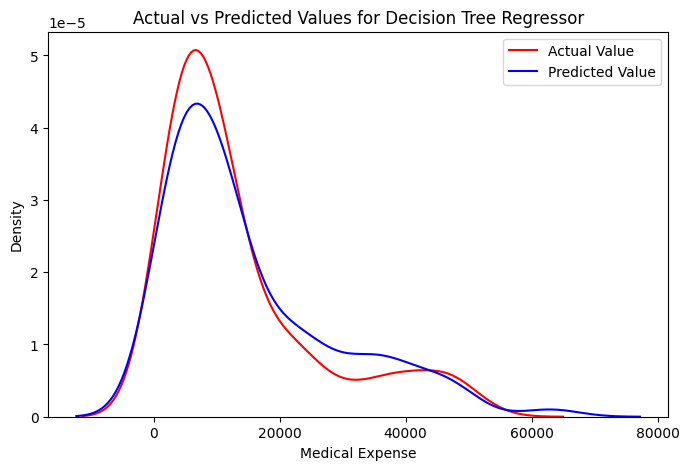

In [59]:
#distribution of actual and predicted values
plt.figure(figsize=(8,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(dtree_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Decision Tree Regressor')
plt.xlabel('Medical Expense')
plt.legend()
plt.show()

### Random Forest Regressor

In [60]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf

RandomForestRegressor()

In [61]:
#mTraining the model using training data
rf.fit(x_train,y_train)
#model accuracy for the training data
print("The R^2 value of the Random Forest Regressor for the training data is=",round(rf.score(x_train,y_train),2))

The R^2 value of the Random Forest Regressor for the training data is= 0.97


In [62]:
#model prediction for the test data
rf_pred = rf.predict(x_test)

In [63]:
# Calculate the accuracy of the predictions
print("Table of Random Forest Regressor for the test dataset")
print('Mean Absolute Error:', mean_absolute_error(y_test,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test,rf_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,rf_pred)))
print('R2 Score:', r2_score(y_test,rf_pred))

Table of Random Forest Regressor for the test dataset
Mean Absolute Error: 2663.714819383737
Mean Squared Error: 19358839.80705115
Root Mean Squared Error: 4399.868157916911
R2 Score: 0.87834572745098


In [64]:
df_rf=pd.DataFrame({'Actual value':y_test,"Predicted Value":rf_pred})
print("Actual vs Predicted  Table for Random Forest Regressor")
df_rf.head(5)

Actual vs Predicted  Table for Random Forest Regressor


,Actual value,Predicted Value
578,9724.53000,12289.037710
610,8547.69130,10310.982873
569,45702.02235,44100.623504
1034,12950.07120,13177.816505
198,9644.25250,10163.013523


C:\Users\Kanchan Chowdhury\AppData\Local\Temp\ipykernel_24480\1067389019.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
C:\Users\Kanchan Chowdhury\AppData\Local\Temp\ipykernel_24480\1067389019.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

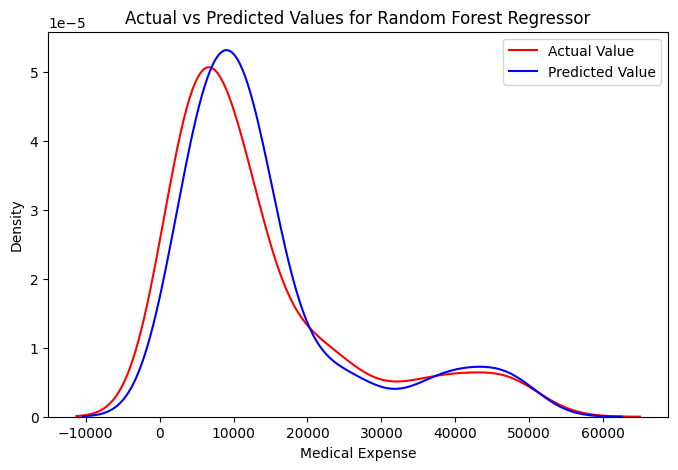

In [65]:
#distribution of actual and predicted values
plt.figure(figsize=(8,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(rf_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Random Forest Regressor')
plt.xlabel('Medical Expense')
plt.legend()
plt.show()

In [66]:
# Calculate the feature importances
feature_importances = rf.feature_importances_

# Print the feature importances
print('Feature Importances:')
for i in range(len(feature_importances)):
    print('Feature:', df.columns[i], 'Importance:', feature_importances[i])

Feature Importances:
Feature: age Importance: 0.13796369290833335
Feature: sex Importance: 0.006046221715004821
Feature: bmi Importance: 0.21836499440781382
Feature: children Importance: 0.020165188015966496
Feature: smoker Importance: 0.6030910955077808
Feature: region Importance: 0.014368807445100745


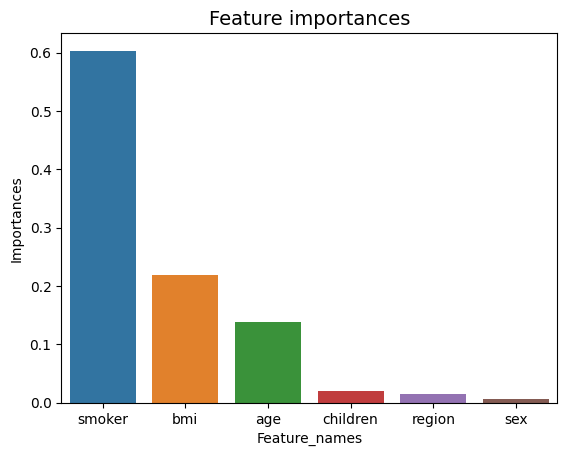

In [67]:
importances_df = pd.DataFrame({"Feature_names" : rf.feature_names_in_, 
                               "Importances" : rf.feature_importances_})
                             
# Sort the DataFrame by importances in descending order
importances_df = importances_df.sort_values(by="Importances", ascending=False)
# Plotting bar chart, g is from graph
g = sns.barplot(x=importances_df["Feature_names"], 
                y=importances_df["Importances"])
g.set_title("Feature importances", fontsize=14); 

### ***Observations***:  

- like we previously noticed smoking is the greatest factor that affects medical cost charges, then it's bmi and age.
--- 

### Polynomial Regression

we will remove region and sex as the features to fit a polynomial regression to our model as they have a very less importance.

In [68]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print("The R^2 value for Polynomial Regresion for the training data is=",round(Pol_reg.score(x_train,y_train),2))

-5325.881705252867
The R^2 value for Polynomial Regresion for the training data is= 0.83


In [69]:
# Calculate the accuracy of the predictions
print("Table of Polynomial Regression for the test dataset")
print('Mean Absolute Error:', mean_absolute_error(y_test,y_test_pred))
print('Mean Squared Error:', mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('R2 Score:', r2_score(y_test,y_test_pred))

Table of Polynomial Regression for the test dataset
Mean Absolute Error: 2824.4950454776517
Mean Squared Error: 18895160.098780446
Root Mean Squared Error: 4346.856346692452
R2 Score: 0.8812595703345225


In [70]:
df_poly=pd.DataFrame({'Actual value':y_test,"Predicted Value":y_test_pred})
print("Actual vs Predicted  Table for Polynomial Regression")
df_poly.head(5)

Actual vs Predicted  Table for Polynomial Regression


,Actual value,Predicted Value
578,9724.53000,12101.156323
610,8547.69130,10440.782266
569,45702.02235,48541.022951
1034,12950.07120,14140.067522
198,9644.25250,8636.235727


C:\Users\Kanchan Chowdhury\AppData\Local\Temp\ipykernel_24480\2651969707.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
C:\Users\Kanchan Chowdhury\AppData\Local\Temp\ipykernel_24480\2651969707.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

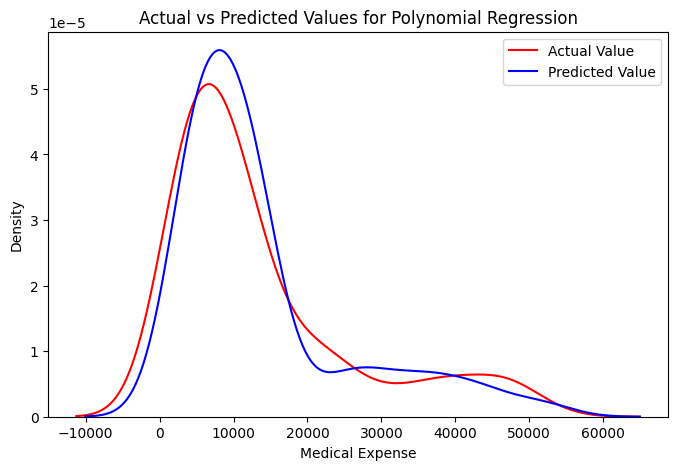

In [71]:
#distribution of actual and predicted values
plt.figure(figsize=(8,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_test_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Polynomial Regression')
plt.xlabel('Medical Expense')
plt.legend()
plt.show()

## ***Conclusion*** 
  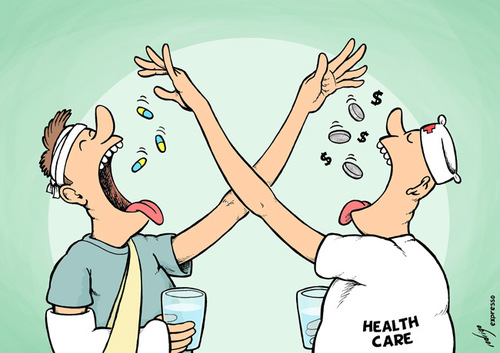

From the above models, we can see that Random Forest Regressor and Polynomial Regression are giving the best results. But, Polynomial Regression is giving the best results with the least RMSE value and highest R^2 Value. Therefore, I will use Polynomial Regression to predict the medical expense of patients.  

--- 


Moreover, the medical expense of smokers is higher than that of non-smokers. The medical expense of patients with BMI greater than 30 is higher than that of patients with BMI less than 30. The medical expense of older patients is higher than that of younger patients.  

--- 


Thus, from the overall analysis, we can conclude that the medical expense of patients depends on their age, BMI, smoking habits.  
 
--- 